In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the Data

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
import shap
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
ql = pd.read_csv("/content/drive/My Drive/Business Analytics/Self Project/Quality of Life Index/Quality_of_Life.csv")
ql

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Wallis And Futuna,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN
232,Western Sahara,0.00,NaN,62.87,'High',0.00,NaN,0.00,NaN,0.00,NaN,12.75,'High',0.00,NaN,0.00,NaN,0.0,NaN
233,Yemen,20.74,'Very Low',34.07,'Low',25.31,'Low',0.00,NaN,48.66,'Low',15.98,'High',15.00,'Very Low',83.17,'Very High',0.0,NaN
234,Zambia,22.32,'Very Low',54.39,'Moderate',54.44,'Moderate',0.00,NaN,36.74,'Very Low',72.42,'Very High',38.86,'Moderate',80.90,'Very High',0.0,NaN


# Data Preprocessing

In [59]:
ql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

In [60]:
ql['Quality of Life Value'] = ql['Quality of Life Value'].str.replace('[:\']', '', regex=True).astype(float)
# Removing '' from data in categorical column
categorical_columns = ['Purchasing Power Category', 'Safety Category', 'Health Care Category',
                       'Climate Category', 'Cost of Living Category', 'Property Price to Income Category',
                       'Traffic Commute Time Category', 'Pollution Category', 'Quality of Life Category']
for col in categorical_columns:
    ql[col] = ql[col].str.replace("'", "", regex=True)
ql

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,Very Low,25.33,Low,24.24,Low,0.00,NaN,21.08,Very Low,7.8,Low,56.17,Very High,84.44,Very High,0.00,NaN
1,Aland Islands,125.01,Very High,71.81,High,79.72,High,0.00,NaN,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,0.00,NaN
2,Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low
3,Alderney,0.00,NaN,83.79,Very High,100.00,Very High,0.00,NaN,0.00,NaN,0.0,NaN,5.00,Very Low,1.72,Very Low,0.00,NaN
4,Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.7,Very High,45.09,High,63.87,High,98.83,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Wallis And Futuna,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.0,NaN,0.00,NaN,0.00,NaN,0.00,NaN
232,Western Sahara,0.00,NaN,62.87,High,0.00,NaN,0.00,NaN,0.00,NaN,12.75,High,0.00,NaN,0.00,NaN,0.00,NaN
233,Yemen,20.74,Very Low,34.07,Low,25.31,Low,0.00,NaN,48.66,Low,15.98,High,15.00,Very Low,83.17,Very High,0.00,NaN
234,Zambia,22.32,Very Low,54.39,Moderate,54.44,Moderate,0.00,NaN,36.74,Very Low,72.42,Very High,38.86,Moderate,80.90,Very High,0.00,NaN


In [61]:
ql['Property Price to Income Value'] = pd.to_numeric(ql['Property Price to Income Value'], errors='coerce')
ql['Quality of Life Value'] = pd.to_numeric(ql['Quality of Life Value'], errors='coerce')

In [62]:
ql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     233 non-null    float64

In [63]:
ql.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,Very Low,25.33,Low,24.24,Low,0.00,NaN,21.08,Very Low,7.80,Low,56.17,Very High,84.44,Very High,0.00,NaN
1,Aland Islands,125.01,Very High,71.81,High,79.72,High,0.00,NaN,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,0.00,NaN
2,Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low
3,Alderney,0.00,NaN,83.79,Very High,100.00,Very High,0.00,NaN,0.00,NaN,0.00,NaN,5.00,Very Low,1.72,Very Low,0.00,NaN
4,Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.70,Very High,45.09,High,63.87,High,98.83,Very Low


## Data Cleaning

In [64]:
ql.isnull().sum()

,0
country,0
Purchasing Power Value,0
Purchasing Power Category,46
Safety Value,0
Safety Category,2
Health Care Value,0
Health Care Category,15
Climate Value,0
Climate Category,122
Cost of Living Value,0


Using KNN Imputer to handling missing value in numerical and categorical variable

In [65]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select the numerical and categorical columns to be imputed
numeric_columns = ['Purchasing Power Value', 'Safety Value', 'Health Care Value',
                   'Climate Value', 'Cost of Living Value', 'Property Price to Income Value',
                   'Traffic Commute Time Value', 'Pollution Value', 'Quality of Life Value']

# Scaling the numerical data
scaler = StandardScaler()
ql[numeric_columns] = scaler.fit_transform(ql[numeric_columns])

# Using KNN Imputer to replace missing values ​​in numeric columns
imputer_numeric = KNNImputer(n_neighbors=5)  # Menggunakan 5 tetangga terdekat untuk imputasi
ql[numeric_columns] = imputer_numeric.fit_transform(ql[numeric_columns])

# Impute missing values ​​in a categorical column with mode (most frequently occurring value)
imputer_categorical = SimpleImputer(strategy='most_frequent')
ql[categorical_columns] = imputer_categorical.fit_transform(ql[categorical_columns])

# After imputation, we return the numerical data to their original scale
ql[numeric_columns] = scaler.inverse_transform(ql[numeric_columns])

# Checking the imputation results
ql

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,Very Low,25.33,Low,24.24,Low,0.00,Very High,21.08,Very Low,7.80,Low,56.17,Very High,8.444000e+01,Very High,0.00,Very High
1,Aland Islands,125.01,Very High,71.81,High,79.72,High,0.00,Very High,53.44,Low,5.33,Low,19.05,Very Low,1.805000e+01,Very Low,0.00,Very High
2,Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,7.725000e+01,High,104.16,Low
3,Alderney,0.00,Very Low,83.79,Very High,100.00,Very High,0.00,Very High,0.00,Very Low,0.00,Very High,5.00,Very Low,1.720000e+00,Very Low,0.00,Very High
4,Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.70,Very High,45.09,High,6.387000e+01,High,98.83,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Wallis And Futuna,0.00,Very Low,0.00,Moderate,0.00,High,0.00,Very High,0.00,Very Low,0.00,Very High,0.00,Very Low,7.105427e-15,High,0.00,Very High
232,Western Sahara,0.00,Very Low,62.87,High,0.00,High,0.00,Very High,0.00,Very Low,12.75,High,0.00,Very Low,7.105427e-15,High,0.00,Very High
233,Yemen,20.74,Very Low,34.07,Low,25.31,Low,0.00,Very High,48.66,Low,15.98,High,15.00,Very Low,8.317000e+01,Very High,0.00,Very High
234,Zambia,22.32,Very Low,54.39,Moderate,54.44,Moderate,0.00,Very High,36.74,Very Low,72.42,Very High,38.86,Moderate,8.090000e+01,Very High,0.00,Very High


## Feature Engineering

In [66]:
category_mapping = {'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5, None: 0}
columns_to_map = ['Purchasing Power Category', 'Safety Category', 'Health Care Category',
                  'Climate Category', 'Cost of Living Category', 'Property Price to Income Category',
                  'Traffic Commute Time Category', 'Pollution Category', 'Quality of Life Category']

for col in columns_to_map:
    ql[col] = ql[col].map(category_mapping)
ql

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,1,25.33,2,24.24,2,0.00,5,21.08,1,7.80,2,56.17,5,8.444000e+01,5,0.00,5
1,Aland Islands,125.01,5,71.81,4,79.72,4,0.00,5,53.44,2,5.33,2,19.05,1,1.805000e+01,1,0.00,5
2,Albania,42.82,2,55.52,3,48.21,3,86.43,5,40.85,2,14.88,4,36.74,3,7.725000e+01,4,104.16,2
3,Alderney,0.00,1,83.79,5,100.00,5,0.00,5,0.00,1,0.00,5,5.00,1,1.720000e+00,1,0.00,5
4,Algeria,27.60,1,47.54,3,54.43,3,94.82,5,25.31,1,21.70,5,45.09,4,6.387000e+01,4,98.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Wallis And Futuna,0.00,1,0.00,3,0.00,4,0.00,5,0.00,1,0.00,5,0.00,1,7.105427e-15,4,0.00,5
232,Western Sahara,0.00,1,62.87,4,0.00,4,0.00,5,0.00,1,12.75,4,0.00,1,7.105427e-15,4,0.00,5
233,Yemen,20.74,1,34.07,2,25.31,2,0.00,5,48.66,2,15.98,4,15.00,1,8.317000e+01,5,0.00,5
234,Zambia,22.32,1,54.39,3,54.44,3,0.00,5,36.74,1,72.42,5,38.86,3,8.090000e+01,5,0.00,5


In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

ql['country'] = label_encoder.fit_transform(ql['country'])
ql

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,0,32.15,1,25.33,2,24.24,2,0.00,5,21.08,1,7.80,2,56.17,5,8.444000e+01,5,0.00,5
1,1,125.01,5,71.81,4,79.72,4,0.00,5,53.44,2,5.33,2,19.05,1,1.805000e+01,1,0.00,5
2,2,42.82,2,55.52,3,48.21,3,86.43,5,40.85,2,14.88,4,36.74,3,7.725000e+01,4,104.16,2
3,3,0.00,1,83.79,5,100.00,5,0.00,5,0.00,1,0.00,5,5.00,1,1.720000e+00,1,0.00,5
4,4,27.60,1,47.54,3,54.43,3,94.82,5,25.31,1,21.70,5,45.09,4,6.387000e+01,4,98.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,231,0.00,1,0.00,3,0.00,4,0.00,5,0.00,1,0.00,5,0.00,1,7.105427e-15,4,0.00,5
232,232,0.00,1,62.87,4,0.00,4,0.00,5,0.00,1,12.75,4,0.00,1,7.105427e-15,4,0.00,5
233,233,20.74,1,34.07,2,25.31,2,0.00,5,48.66,2,15.98,4,15.00,1,8.317000e+01,5,0.00,5
234,234,22.32,1,54.39,3,54.44,3,0.00,5,36.74,1,72.42,5,38.86,3,8.090000e+01,5,0.00,5


In [68]:
# Adding additional features

ql['Income_to_Property_Ratio'] = ql['Purchasing Power Value'] / (ql['Property Price to Income Value'] + 1e-6)
ql['Safety_to_Pollution_Ratio'] = ql['Safety Value'] / (ql['Pollution Value'] + 1e-6)
ql['Health_Index_Score'] = (ql['Health Care Value'] + ql['Climate Value']) / 2

ql.head()

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,...,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category,Income_to_Property_Ratio,Safety_to_Pollution_Ratio,Health_Index_Score
0,0,32.15,1,25.33,2,24.24,2,0.00,5,21.08,...,2,56.17,5,84.44,5,0.00,5,4.121794,0.299976,12.120
1,1,125.01,5,71.81,4,79.72,4,0.00,5,53.44,...,2,19.05,1,18.05,1,0.00,5,23.454029,3.978393,39.860
2,2,42.82,2,55.52,3,48.21,3,86.43,5,40.85,...,4,36.74,3,77.25,4,104.16,2,2.877688,0.718705,67.320
3,3,0.00,1,83.79,5,100.00,5,0.00,5,0.00,...,5,5.00,1,1.72,1,0.00,5,0.000000,48.715088,50.000
4,4,27.60,1,47.54,3,54.43,3,94.82,5,25.31,...,5,45.09,4,63.87,4,98.83,1,1.271889,0.744324,74.625


## Scaling Numerical Data

In [69]:
scaler = StandardScaler()
ql[numeric_columns] = scaler.fit_transform(ql[numeric_columns])
ql

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,...,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category,Income_to_Property_Ratio,Safety_to_Pollution_Ratio,Health_Index_Score
0,0,-0.451334,1,-1.774126,2,-1.482788,2,-0.922317,5,-0.633248,...,2,1.598863,5,1.169579,5,-0.867600,5,4.121794,2.999763e-01,12.120
1,1,1.337947,5,0.979686,4,1.215173,4,-0.922317,5,0.612740,...,2,-0.545507,1,-1.403790,1,-0.867600,5,23.454029,3.978393e+00,39.860
2,2,-0.245738,2,0.014548,3,-0.317140,3,1.197889,5,0.127975,...,4,0.476419,3,0.890885,4,0.556282,2,2.877688,7.187055e-01,67.320
3,3,-1.070819,1,1.689468,5,2.201378,5,-0.922317,5,-1.444911,...,5,-1.357155,1,-2.036764,1,-0.867600,5,0.000000,4.871509e+01,50.000
4,4,-0.539006,1,-0.458245,3,-0.014665,3,1.403703,5,-0.470376,...,5,0.958787,4,0.372257,4,0.483420,1,1.271889,7.443244e-01,74.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,231,-1.070819,1,-3.274858,3,-2.661565,4,-0.922317,5,-1.444911,...,5,-1.645998,1,-2.103433,4,-0.867600,5,0.000000,0.000000e+00,0.000
232,232,-1.070819,1,0.450015,4,-2.661565,4,-0.922317,5,-1.444911,...,4,-1.645998,1,-2.103433,4,-0.867600,5,0.000000,6.287000e+07,0.000
233,233,-0.671189,1,-1.256305,2,-1.430754,2,-0.922317,5,0.428691,...,4,-0.779469,1,1.120352,5,-0.867600,5,1.297872,4.096429e-01,12.655
234,234,-0.640744,1,-0.052401,3,-0.014179,3,-0.922317,5,-0.030276,...,5,0.598889,3,1.032364,5,-0.867600,5,0.308202,6.723115e-01,27.220


# EDA (Exploratory Data Analysis)

### Data Distribution

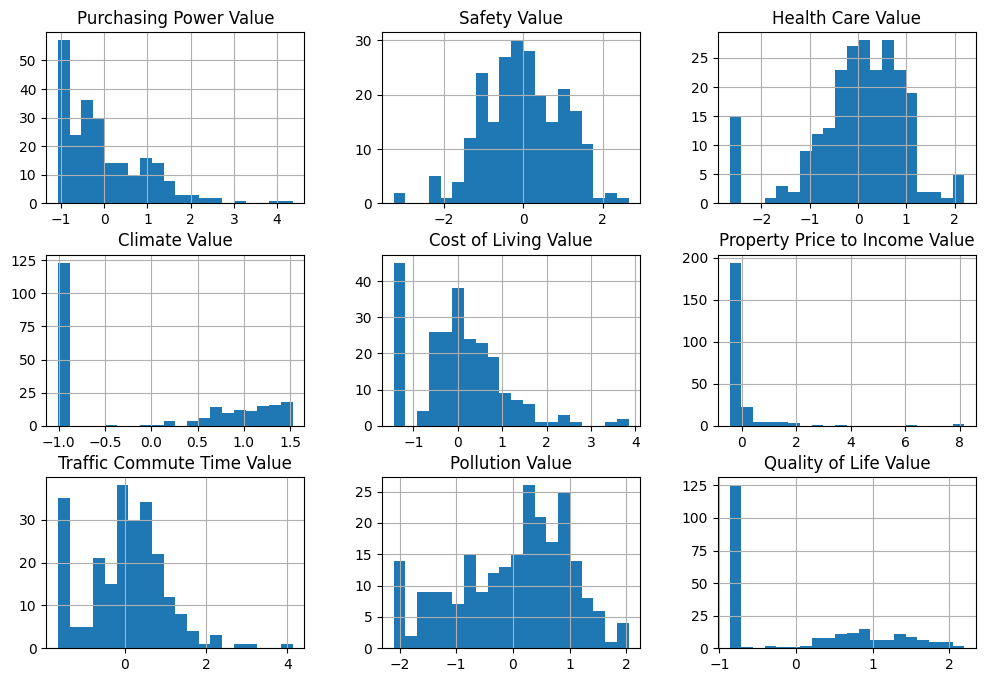

In [70]:
ql[numeric_columns].hist(figsize=(12, 8), bins=20)
plt.show()

### Correlation

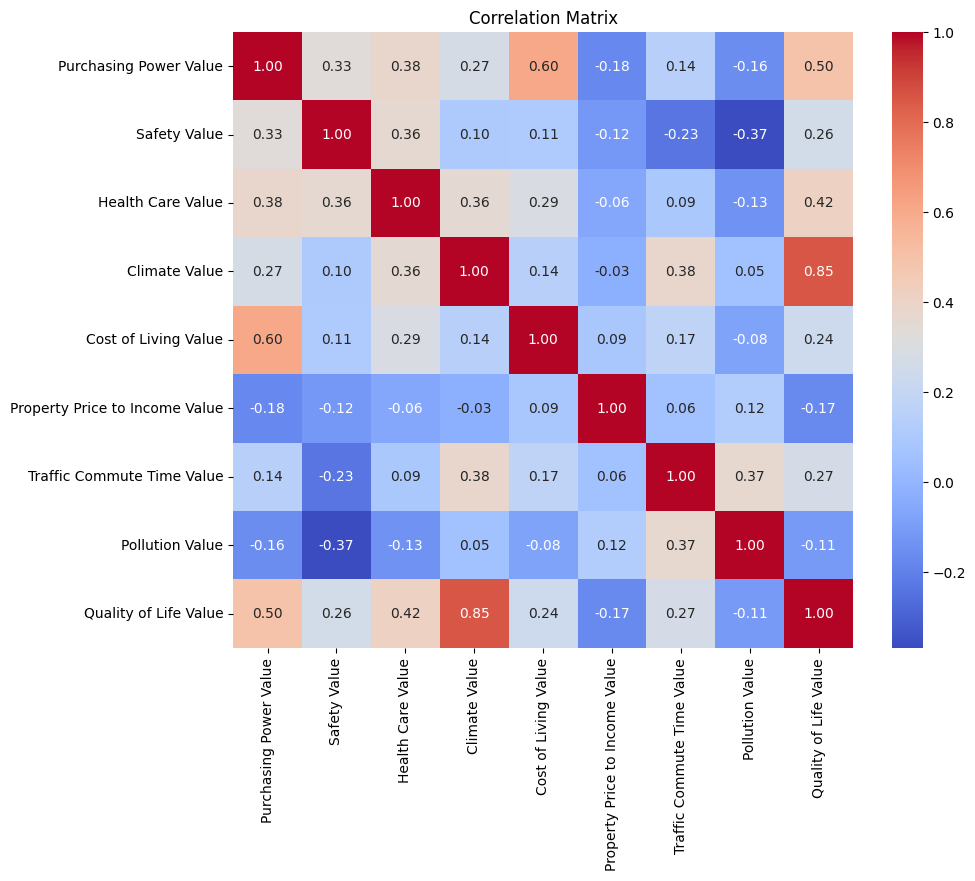

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(ql[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Model Training and Machine Learning

Linear Regression Performance:
RMSE: 0.3180, MAE: 0.2272, R²: 0.8988, CV R²: -11072451341.9699

Random Forest Performance:
RMSE: 0.1479, MAE: 0.0927, R²: 0.9781, CV R²: 0.9483

XGBoost Performance:
RMSE: 0.1523, MAE: 0.0855, R²: 0.9768, CV R²: 0.9447



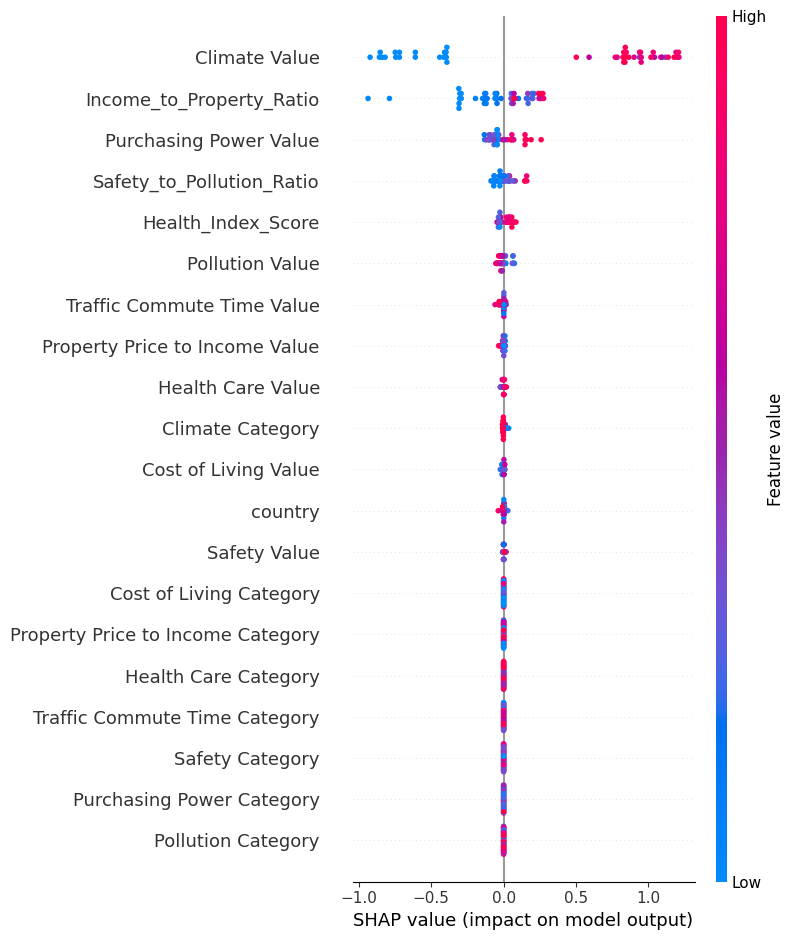

In [75]:
# Using Quality of Life as a target for regression
X = ql.drop(columns=['Quality of Life Value', 'Quality of Life Category'])
y = ql['Quality of Life Value']

# PCA for Dimensionality Reduction
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Evaluation Function
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, CV R²: {cv_r2:.4f}\n")

    return y_pred

# 1️⃣ Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = evaluate_model(lr, X_train, X_test, y_train, y_test, "Linear Regression")

# 2️⃣ Random Forest Regressor with GridSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5]
}
rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=3, scoring='r2')
rf.fit(X_train, y_train)
y_pred_rf = evaluate_model(rf.best_estimator_, X_train, X_test, y_train, y_test, "Random Forest")

# 3️⃣ XGBoost Regressor with SHAP Feature Importance
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test, "XGBoost")

# SHAP Analysis
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


## Clustering using K-Means with PCA-Reduced Data

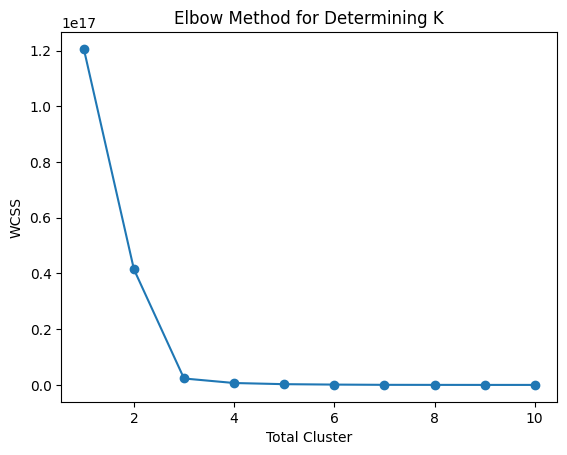

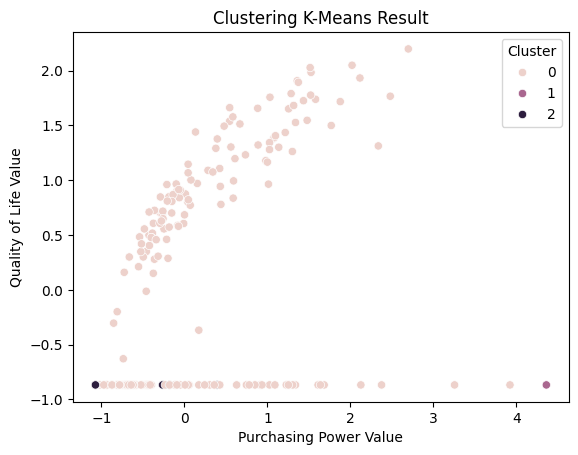

In [76]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Total Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining K')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ql['Cluster'] = kmeans.fit_predict(X_pca)

sns.scatterplot(x=ql['Purchasing Power Value'], y=ql['Quality of Life Value'], hue=ql['Cluster'])
plt.title("Clustering K-Means Result")
plt.show()

# Hyperparameter Tuning

Best Parameters from RandomizedSearchCV: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'bootstrap': True}
Tuned Random Forest Performance:
RMSE: 0.1601, MAE: 0.0997, R²: 0.9743, CV R²: 0.9478



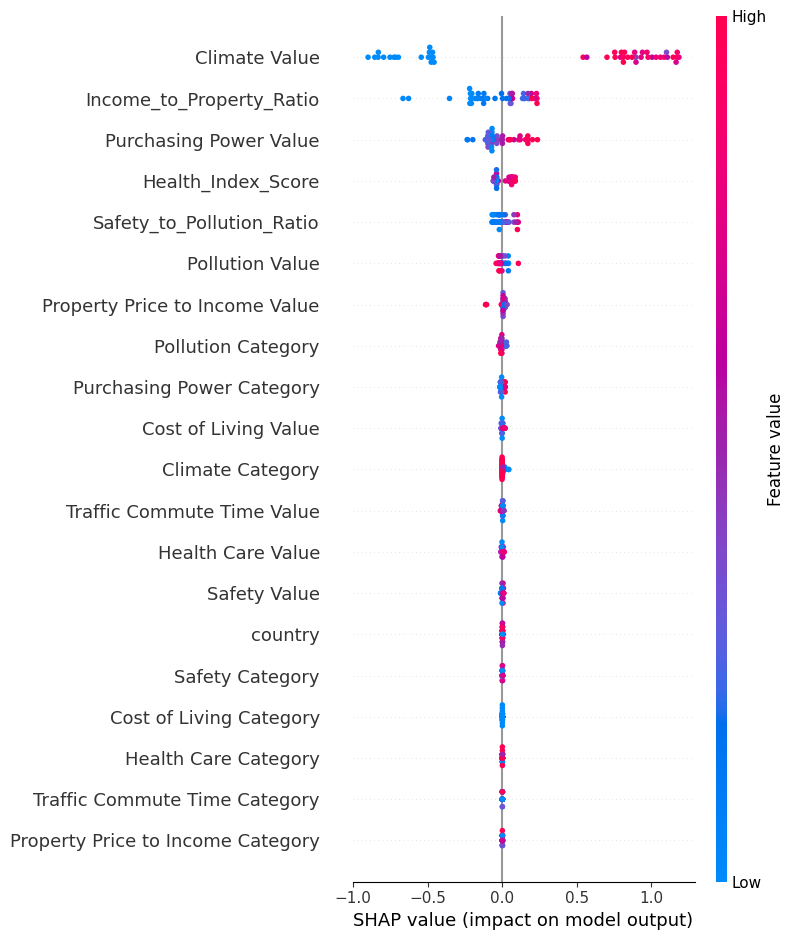

In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import shap

# Hyperparameter Grid for Randomized Search
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# Stage 1: Randomized Search
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20, cv=5, scoring="r2", n_jobs=-1, random_state=42
)

rf_random.fit(X_train, y_train)
best_params = rf_random.best_params_
print("Best Parameters from RandomizedSearchCV:", best_params)

# Stage 2: Grid Search with Best Parameters from Randomized Search
param_grid = {
    "n_estimators": [best_params["n_estimators"] - 50, best_params["n_estimators"], best_params["n_estimators"] + 50],
    "max_depth": [None, best_params["max_depth"], best_params["max_depth"] + 10 if best_params["max_depth"] is not None else None],
    "min_samples_split": [best_params["min_samples_split"]],
    "min_samples_leaf": [best_params["min_samples_leaf"]],
    "max_features": [best_params["max_features"]],
    "bootstrap": [best_params["bootstrap"]]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5, scoring="r2", n_jobs=-1
)

rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Evaluate Tuned Model
y_pred_rf_tuned = best_rf.predict(X_test)
evaluate_model(best_rf, X_train, X_test, y_train, y_test, "Tuned Random Forest")

# Feature Importance with SHAP
explainer = shap.Explainer(best_rf)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)
